In [ ]:
import pandas as pd
import duckdb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
conn=duckdb.connect("Vendor_sales_analysis/vendor_sales_analysis.duckdb")
df=conn.execute("select * from vendor_sales_summary").fetchdf()
df.head()

VendorNumber                VendorName  Brand              Description  \
0          1128         BROWN-FORMAN CORP   1233  Jack Daniels No 7 Black   
1          4425     MARTIGNETTI COMPANIES   3405    Tito's Handmade Vodka   
2         17035         PERNOD RICARD USA   8068         Absolut 80 Proof   
3          3960  DIAGEO NORTH AMERICA INC   4261   Capt Morgan Spiced Rum   
4          3960  DIAGEO NORTH AMERICA INC   3545          Ketel One Vodka   

   PurchasePrice  ActualPrice  Volume  TotalPurchaseQuantity  \
0          26.27        36.99  1750.0               145080.0   
1          23.19        28.99  1750.0               164038.0   
2          18.24        24.99  1750.0               187407.0   
3          16.17        22.99  1750.0               201682.0   
4          21.89        29.99  1750.0               138109.0   

   TotalPurchaseDollars  TotalSalesQuantity  TotalSalesDollars  \
0            3811251.60            142049.0         5101919.51   
1            3804041.22            160247.0         4819073.49   
2            3418303.68            187140.0         4538120.60   
3            3261197.94            200412.0         4475972.88   
4            3023206.01            135838.0         4223107.62   

   TotalSalesPrice  TotalExciseTax  FreightCost  GrossProfit  ProfitMargin  \
0        672819.31       260999.20     68601.68   1290667.91     25.297693   
1        561512.37       294438.66    144929.24   1015032.27     21.062810   
2        461140.15       343854.07    123780.22   1119816.92     24.675786   
3        420050.01       368242.80    257032.07   1214774.94     27.139908   
4        545778.28       249587.83    257032.07   1199901.61     28.412764   

   StockTurnover  SalesToPurchaseRatio  
0       0.979108              1.338647  
1       0.976890              1.266830  
2       0.998575              1.327594  
3       0.993703              1.372493  
4       0.983556              1.396897

In [26]:
df.to_csv('vendor_sales_summary.csv',index  = False)

In [27]:
# Summary statistics for numerical columns
summary_stats = df.describe().T  
display(summary_stats)

count          mean            std           min  \
VendorNumber           10692.0  10650.649458   18753.519148      2.000000   
Brand                  10692.0  18039.228769   12662.187074     58.000000   
PurchasePrice          10692.0     24.385303     109.269375      0.360000   
ActualPrice            10692.0     35.643671     148.246016      0.490000   
Volume                 10692.0    847.360550     664.309212     50.000000   
TotalPurchaseQuantity  10692.0   3140.886831   11095.086769      1.000000   
TotalPurchaseDollars   10692.0  30106.693372  123067.799627      0.710000   
TotalSalesQuantity     10692.0   3077.482136   10952.851391      0.000000   
TotalSalesDollars      10692.0  42239.074419  167655.265984      0.000000   
TotalSalesPrice        10692.0  18793.783627   44952.773386      0.000000   
TotalExciseTax         10692.0   1774.226259   10975.582240      0.000000   
FreightCost            10692.0  61433.763214   60938.458032      0.090000   
GrossProfit            10692.0  12158.773084   46214.338722 -52002.780000   
ProfitMargin           10692.0    -15.620770     443.555329 -23730.638953   
StockTurnover          10692.0      1.706793       6.020460      0.000000   
SalesToPurchaseRatio   10692.0      2.504390       8.459067      0.000000   

                                25%           50%           75%           max  
VendorNumber            3951.000000   7153.000000   9552.000000  2.013590e+05  
Brand                   5793.500000  18761.500000  25514.250000  9.063100e+04  
PurchasePrice              6.840000     10.455000     19.482500  5.681810e+03  
ActualPrice               10.990000     15.990000     28.990000  7.499990e+03  
Volume                   750.000000    750.000000    750.000000  2.000000e+04  
TotalPurchaseQuantity     36.000000    262.000000   1975.750000  3.376600e+05  
TotalPurchaseDollars     453.457500   3655.465000  20738.245000  3.811252e+06  
TotalSalesQuantity        33.000000    261.000000   1929.250000  3.349390e+05  
TotalSalesDollars        729.220000   5298.045000  28396.915000  5.101920e+06  
TotalSalesPrice          289.710000   2857.800000  16059.562500  6.728193e+05  
TotalExciseTax             4.800000     46.570000    418.650000  3.682428e+05  
FreightCost            14069.870000  50293.620000  79528.990000  2.570321e+05  
GrossProfit               52.920000   1399.640000   8660.200000  1.290668e+06  
ProfitMargin              13.324515     30.405457     39.956135  9.971666e+01  
StockTurnover              0.807229      0.981529      1.039342  2.745000e+02  
SalesToPurchaseRatio       1.153729      1.436894      1.665449  3.529286e+02

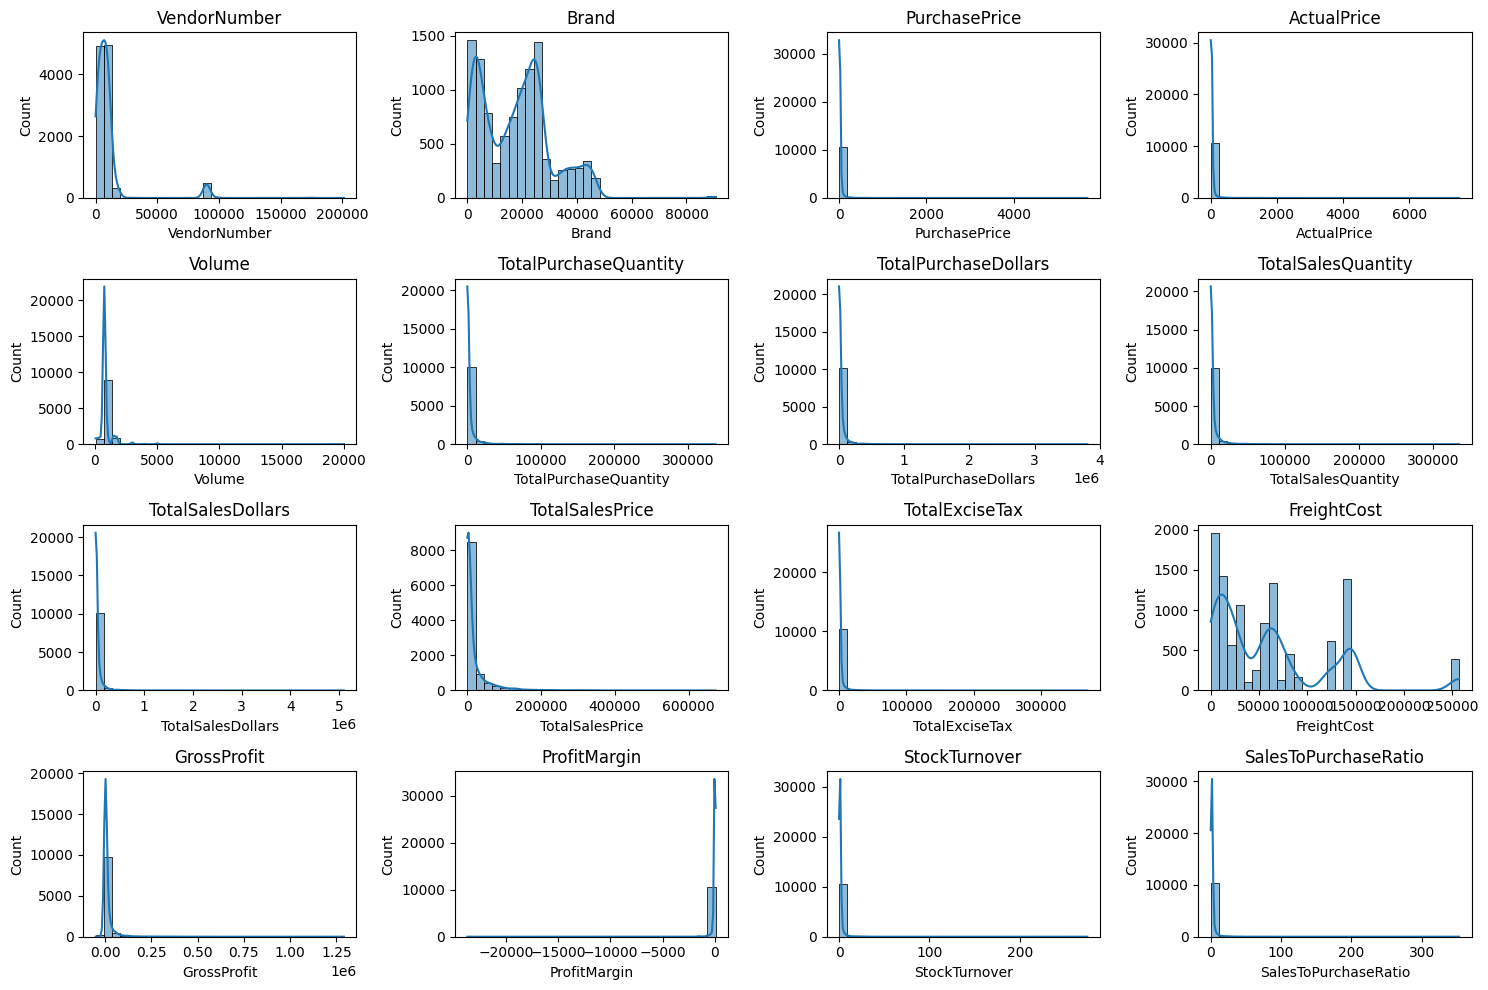

In [28]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

In [29]:
# Outlier Detection with Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Insights

-Gross Profit: Losses as high as –52K indicate certain products are being sold below cost, likely due to heavy discounting or high procurement costs.

-Profit Margin: Negative or undefined margins (–∞) occur when sales revenue is zero or lower than costs, highlighting unprofitable transactions.

-Sales Quantity & Revenue: Some items show zero sales, pointing to slow-moving or obsolete inventory.

Key Outliers:

-Product Pricing: A few premium items priced up to 7.5K, far above the average (~35), skew the distribution.

-Freight Costs: Wide range (0.09 to 257K) suggests inefficiencies or occasional bulk shipments driving cost spikes.

-Stock Turnover: Highly uneven (0 to 274.5). Some products sell out rapidly, while others remain unsold. Values >1 imply reliance on older stock to fulfill demand.

In [30]:
# let's filter the data by removing inconsistencies
df = pd.read_sql_query("""SELECT * 
FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0""",conn)

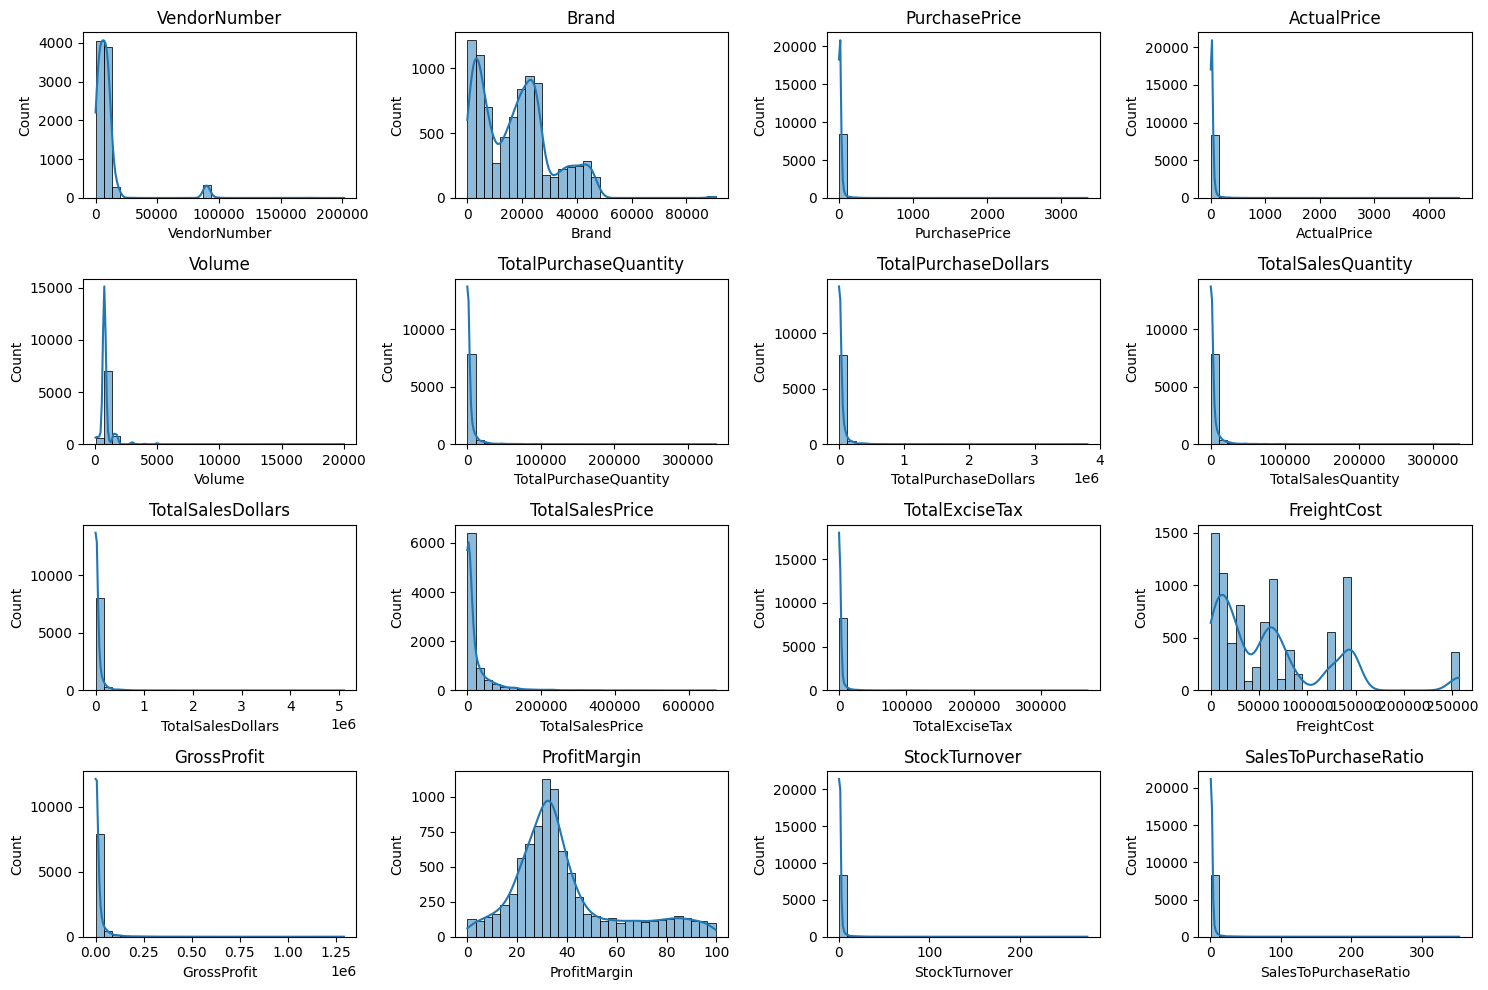

In [31]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

In [32]:
# Count Plots for Categorical Columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])  # Top 10 categories
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

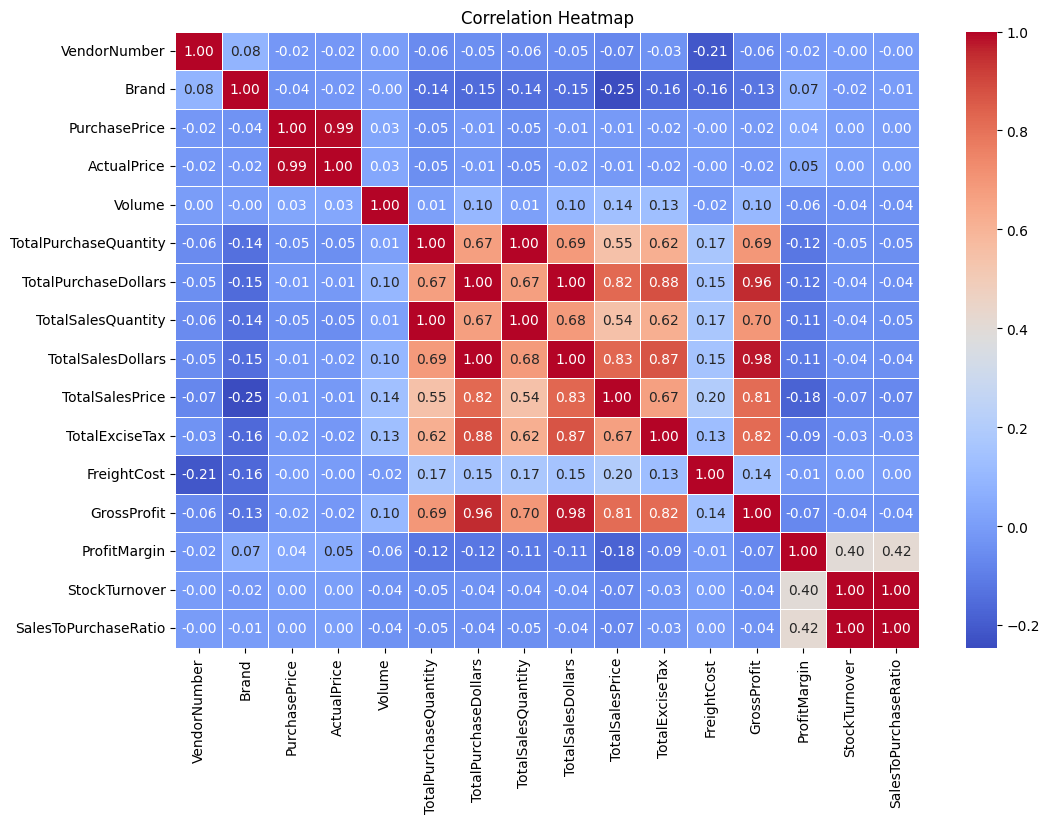

In [33]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Insights

-Price vs. Sales/Profit: Purchase price shows almost no link to sales or profit, meaning pricing alone isn’t driving performance.

-Inventory Flow: Near-perfect correlation (0.999) between purchases and sales confirms highly efficient stock movement.

-Margins vs. Sales Price: Higher sales prices are linked to lower margins, hinting at competitive or discount-driven dynamics.

-Turnover vs. Profitability: Faster stock turnover doesn’t guarantee higher profits, suggesting other factors (costs, pricing strategy) play a bigger role.

Solving some buisness problems

Target high-margin brands with underperforming sales

In [34]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',  # Sales performance metric
    'ProfitMargin': 'mean'       # Average profit margin
}).reset_index()

brand_performance.sort_values('ProfitMargin')

Description  TotalSalesDollars  ProfitMargin
5485        Pepperjack Barossa Red             191.92      0.020842
2954  Flint & Steel Svgn Bl Napa V             119.92      0.033356
2179             Croft Tawny Porto             191.84      0.041701
2561          Douglass Hill Merlot             143.76      0.083472
5385   Parducci 13 True Grit Chard           24927.81      0.121190
...                            ...                ...           ...
4568             M Chiarlo Gavi Wh            1208.90     99.393664
657        Beniotome Sesame Shochu            4768.41     99.534226
6449    Skinnygirl Tangerine Vodka            2368.42     99.544844
2411            DiSaronno Amaretto            4781.16     99.553246
5528  Pezzi King Svgn Bl Dry Creek            2221.29     99.604734

[7707 rows x 3 columns]

In [35]:
# threshold for "low sales" (bottom 15%) and "high margin" (top 15%)
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

# Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


Description  TotalSalesDollars  ProfitMargin
6199    Santa Rita Organic Svgn Bl               9.99     66.466466
2369             Debauchery Pnt Nr              11.58     65.975820
2070   Concannon Glen Ellen Wh Zin              15.95     83.448276
2188             Crown Royal Apple              27.86     89.806174
6237  Sauza Sprklg Wild Berry Marg              27.96     82.153076
...                            ...                ...           ...
5074   Nanbu Bijin Southern Beauty             535.68     76.747312
2271         Dad's Hat Rye Whiskey             538.89     81.851584
57       A Bichot Clos Marechaudes             539.94     67.740860
6245     Sbragia Home Ranch Merlot             549.75     66.444748
3326     Goulee Cos d'Estournel 10             558.87     69.434752

[198 rows x 3 columns]

In [36]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000] # for better visualization

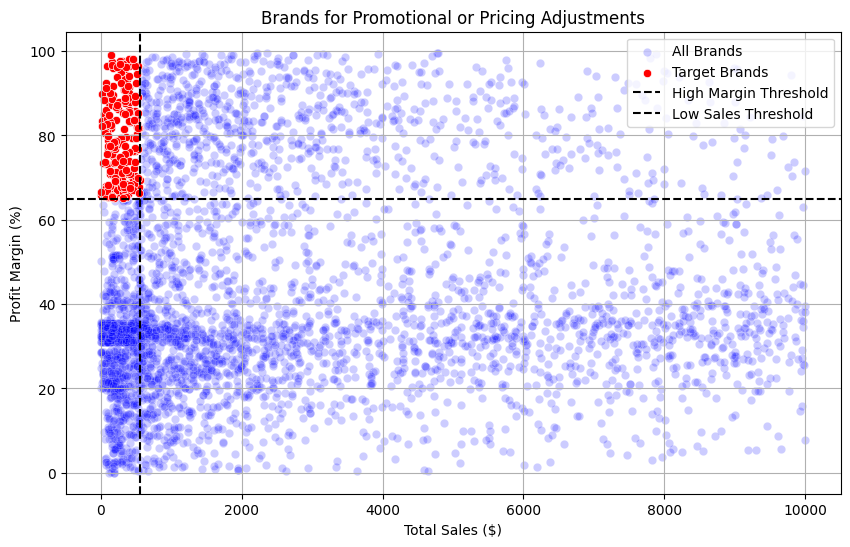

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

Highlight top-selling vendors and brands

In [41]:
def format_dollars(value):
    if value >= 10_00_000:
        return f"{value / 10_00_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [39]:
# Top Vendors & Brands by Sales Performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [42]:
top_vendors.apply(format_dollars)

VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: TotalSalesDollars, dtype: object

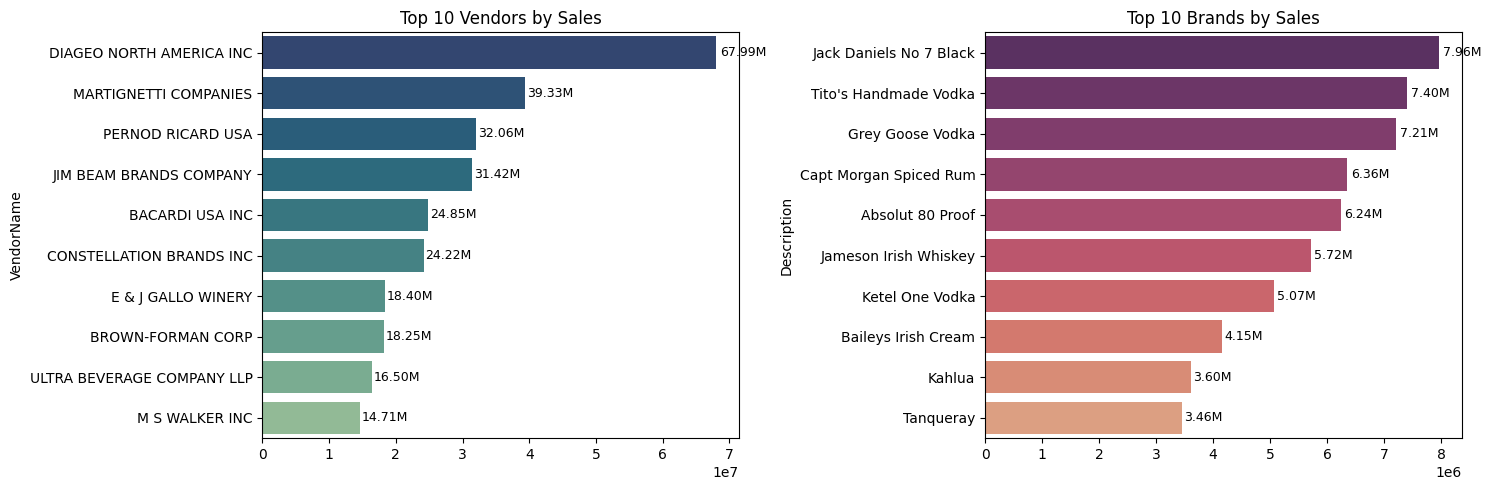

In [45]:
plt.figure(figsize=(15, 5))

# Function to add labels
def add_labels(ax):
    for bar in ax.patches:
        ax.text(bar.get_width() * 1.01, 
                bar.get_y() + bar.get_height() / 2, 
                format_dollars(bar.get_width()), 
                va='center', fontsize=9, color='black')

# Top Vendors 
ax1 = plt.subplot(1, 2, 1)
sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="crest_r", ax=ax1)
ax1.set_title("Top 10 Vendors by Sales")
add_labels(ax1)

# Top Brands 
ax2 = plt.subplot(1, 2, 2)
sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="flare_r", ax=ax2)
ax2.set_title("Top 10 Brands by Sales")
add_labels(ax2)

plt.tight_layout()
plt.show()


Identify vendors contributing most to total purchasing

In [ ]:
vendor_performance = df.groupby("VendorName").agg({
    "TotalPurchaseDollars": "sum",
    "GrossProfit": "sum",
    "TotalSalesDollars":"sum"
}).reset_index()

# Calculating Contribution % to Overall Purchasement
vendor_performance["Purchase_Contribution%"] = (vendor_performance["TotalPurchaseDollars"] / vendor_performance["TotalPurchaseDollars"].sum()) * 100

# Rank Vendors by Total Purchase Dollars 
vendor_performance = round(vendor_performance.sort_values(by="TotalPurchaseDollars", ascending=False),2)

# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

VendorName TotalPurchaseDollars GrossProfit  \
25     DIAGEO NORTH AMERICA INC               50.10M      17.89M   
57        MARTIGNETTI COMPANIES               25.50M      13.83M   
68            PERNOD RICARD USA               23.85M       8.21M   
46      JIM BEAM BRANDS COMPANY               23.49M       7.93M   
6               BACARDI USA INC               17.43M       7.42M   
20     CONSTELLATION BRANDS INC               15.27M       8.95M   
11            BROWN-FORMAN CORP               13.24M       5.01M   
30           E & J GALLO WINERY               12.07M       6.33M   
106  ULTRA BEVERAGE COMPANY LLP               11.17M       5.34M   
53               M S WALKER INC                9.76M       4.94M   

    TotalSalesDollars  Purchase_Contribution%  
25             67.99M                   16.30  
57             39.33M                    8.30  
68             32.06M                    7.76  
46             31.42M                    7.64  
6              24.85M                    5.67  
20             24.22M                    4.97  
11             18.25M                    4.31  
30             18.40M                    3.93  
106            16.50M                    3.63  
53             14.71M                    3.18

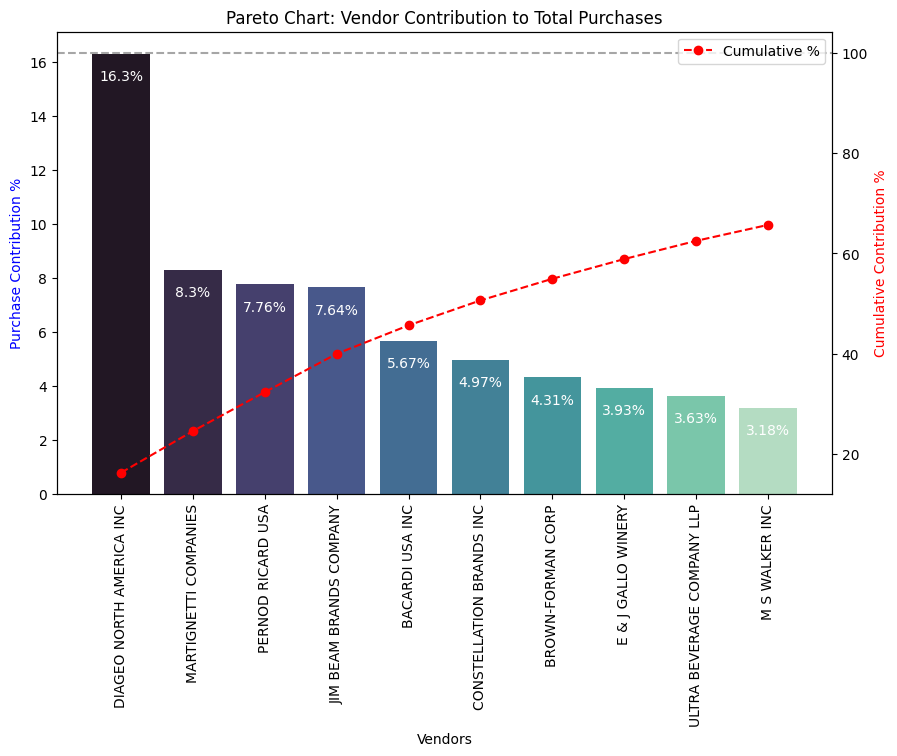

In [48]:
top_vendors['Cumulative_Contribution%'] = top_vendors['Purchase_Contribution%'].cumsum()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['Purchase_Contribution%'],  palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['Purchase_Contribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative %')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

What share of total procurement comes from top vendors?

Total Purchase Contribution of top 10 vendors is 65.69 %


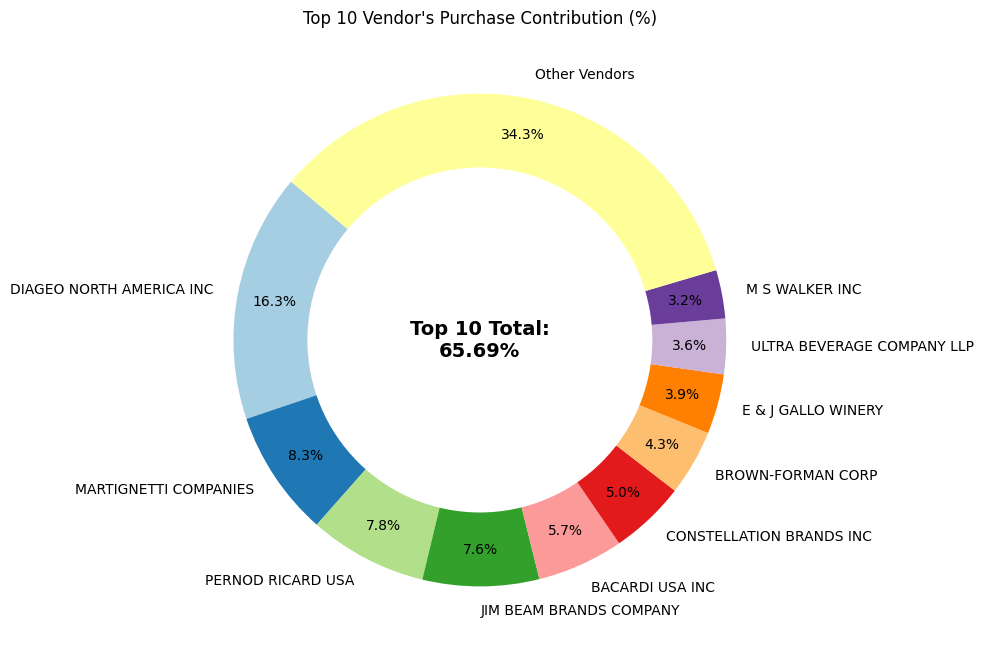

In [51]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['Purchase_Contribution%'].sum(),2)} %")

vendors = top_vendors['VendorName'].to_list()
purchase_contributions = top_vendors['Purchase_Contribution%'].to_list()
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

Insight

Remaining vendors contribute only 34.31%, indicating low utilization or weak competitiveness. High dependency on top vendors suggests a need to explore new suppliers to reduce risk.

Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [52]:
# Calculate Unit Purchase Price per Vendor & Volume Group
df["UnitPurchasePrice"] = df["TotalPurchaseDollars"] / df["TotalPurchaseQuantity"]

# Group by Order Sizes (e.g., Small, Medium, Large Purchases)
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q=3, labels=["Small", "Medium", "Large"])

# Analyze Cost Savings per Order Size
bulk_purchase_analysis = df.groupby("OrderSize")["UnitPurchasePrice"].mean().reset_index()
print(bulk_purchase_analysis)


  OrderSize  UnitPurchasePrice
0     Small          39.068186
1    Medium          15.486414
2     Large          10.777625


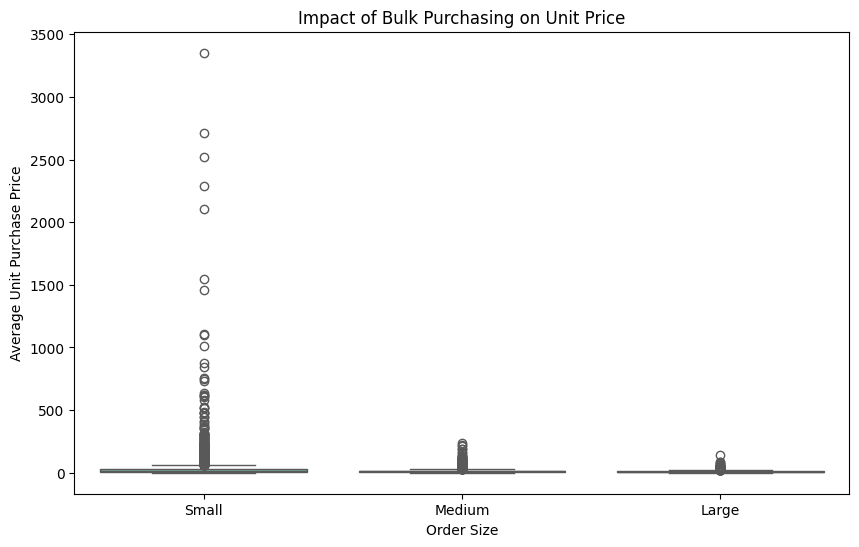

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

Insights

Large orders secure the lowest unit price ($10.78), offering higher margins with efficient inventory management.
The gap between small and large orders is significant (~72% lower cost per unit).
Bulk pricing clearly encourages higher volumes, increasing total sales despite reduced per-unit revenue.

Which vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [54]:
# Identify Low Inventory Turnover Vendors
low_turnover_vendors = df[df["StockTurnover"] < 1].groupby("VendorName")["StockTurnover"].mean().reset_index()

# Sort by Lowest Turnover
low_turnover_vendors = low_turnover_vendors.sort_values(by="StockTurnover", ascending=True)
low_turnover_vendors.head(10)


VendorName  StockTurnover
0           ALISA CARR BEVERAGES       0.615385
36   HIGHLAND WINE MERCHANTS LLC       0.708333
60       PARK STREET IMPORTS LLC       0.751306
19                   Circa Wines       0.755676
26             Dunn Wine Brokers       0.766022
15           CENTEUR IMPORTS LLC       0.773953
78   SMOKY QUARTZ DISTILLERY LLC       0.783835
90           TAMWORTH DISTILLING       0.797078
91        THE IMPORTED GRAPE LLC       0.807569
101      WALPOLE MTN VIEW WINERY       0.820548

In [55]:
# Calculate Unsold Inventory Value
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]
print('Total Unsold Capital:', format_dollars(df["UnsoldInventoryValue"].sum()))

# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

Total Unsold Capital: 2.71M


VendorName UnsoldInventoryValue
25   DIAGEO NORTH AMERICA INC              722.21K
46    JIM BEAM BRANDS COMPANY              554.67K
68          PERNOD RICARD USA              470.63K
116  WILLIAM GRANT & SONS INC              401.96K
30         E & J GALLO WINERY              228.28K
79             SAZERAC CO INC              198.44K
11          BROWN-FORMAN CORP              177.73K
20   CONSTELLATION BRANDS INC              133.62K
61      MOET HENNESSY USA INC              126.48K
77     REMY COINTREAU USA INC              118.60K